    CHAPTER 2 : DATA AND SAMPLING DISTRIBUTIONS

Population means the whole data  .. generally the large data set

Sample means the subset data from the population

Random sampling means that each member of the sample has equal probability to get chosen.

Sampling with replacement means population member that is once chosen for a sample ..  is put back to the population to get another sample and the same population member have chance to get chosen once again

Sampling concept is used in cross validation step to get sample of random or stratified sampling

Dividing the population into strata and randomly sampling from each strata.(strata means homogenous subgroup of population with common characteristics)

Bias-means leaning towards some representation which does not represent the population correctly 
for example taking only feedback from the rich.. deviates from population as it contains poor and middle class people

    BIAS

Statistical bais refer to the  sampling error that are systematic that is produced by the measurement process(taking feedback from only the rich) or by bias error occuring through the sampling(feedback is taken from all but the sampling is done such that it contains on ly rich people)

Random sampling error is also an error but there is no systematic pattern to it

     Quality vs quantity 

Always try to prefer the quality data over the quantity data

A true big data problem is like search engine of google where more queries(quiers are stored as a records) helps to give out better results

myu- Greek symbol is the mean of the population
x bar is the symbol tht represents the mean of the sample 

     Sampling Distribution of a statistics

In [17]:
import pandas as pd
import seaborn as sns

In [84]:
path='/home/anish/plan/practical_statistics_notes/data/loans_income.csv'
loans_income=pd.read_csv(path)
loans_income=loans_income


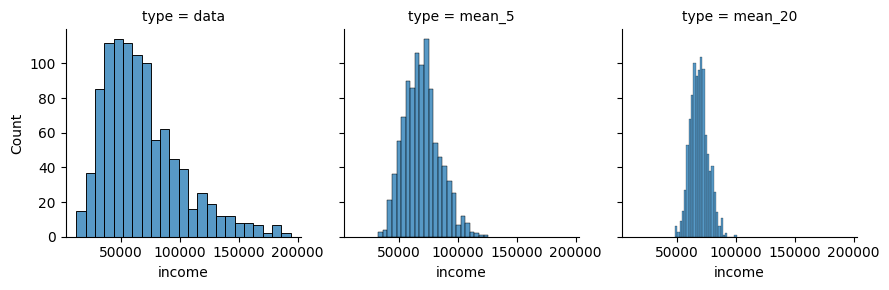

In [104]:
data_sample=pd.DataFrame({'income':loans_income.x.sample(1000),'type':'data'})

m5=[loans_income.x.sample(5).mean() for _ in range(1000)]
mean_5=pd.DataFrame({'income':m5,'type':'mean_5'})

m20=[loans_income.x.sample(20).mean() for _ in range(1000)]
mean_20=pd.DataFrame({'income':m20,'type':'mean_20'})

res=pd.concat([data_sample,mean_5,mean_20])
gridplot=sns.FacetGrid(res,col='type',col_wrap=3)

gridplot.map(sns.histplot,'income',)